In [49]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense

In [50]:
seed = 20
plt.style.use('seaborn')

In [51]:
import warnings
warnings.filterwarnings("ignore")

## Load Datasets

In [52]:
df_people = pd.read_csv("train.csv")

In [53]:
df_people.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [54]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [55]:
columns_to_keep = ['job_level', 'job_duration_in_current_job_level', 'person_level', 
                   'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'Employee_type', 
                   'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences', 
                   'Education_level', 'GPA','year_graduated', 'job_duration_from_training', 'branch_rotation', 
                   'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 
                   'Last_achievement_%', 'Achievement_above_100%_during3quartal','Best Performance']

df_people = df_people[columns_to_keep]

In [56]:
df_people.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [57]:
# under-sampling
# df_people_0 = df_people[df_people['Best Performance'] == 0][:4000]
# df_people_1 = df_people[df_people['Best Performance'] == 1]

# df_people = pd.concat([df_people_0, df_people_1])

# sns.countplot(x='Best Performance', data=df_people)
# plt.show()

## Preprocess Data

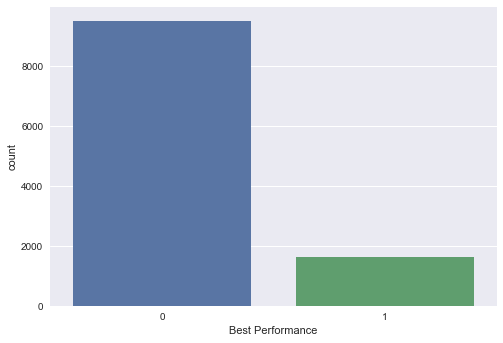

In [58]:
sns.countplot(x='Best Performance', data=df_people)
plt.show()

In [59]:
# convert year birth into age
now = datetime.datetime.now()
current_year = now.year
df_people['age'] = current_year - df_people['age']

# change Y/N into 1/0
df_people['marital_status_maried(Y/N)'] = df_people['marital_status_maried(Y/N)'].map(dict(Y=1, N=0))

Total rows: 11153
Total features: 22


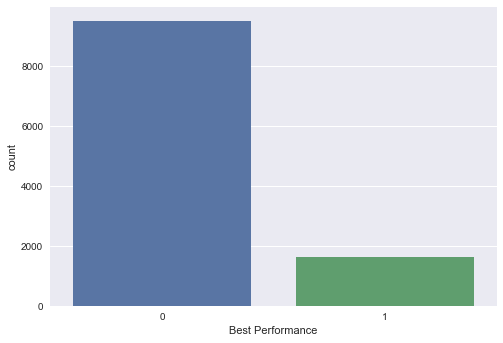

In [60]:
# fill missing values
df_people = df_people.fillna(df_people.mean())

print('Total rows:', df_people.shape[0])
print('Total features:', df_people.shape[1])

sns.countplot(x='Best Performance', data=df_people)
plt.show()

In [61]:
# process categorical data (one-hot-encoding)
cat_vars = ['Employee_type', 'gender']
for var in cat_vars:
    data_dummies = pd.get_dummies(df_people[var], prefix=var)
    df_people = pd.concat([df_people, data_dummies], axis=1)

In [62]:
# remove categorical data
data_vars = df_people.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # filter process

df_people = df_people[to_keep]
df_people.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,...,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,gender_1,gender_2
0,JG04,1.352775,PG03,1.352775,1.732051,36,1,1,level_0,2.86,...,3,0,46.37,0.0,0,1,0,0,0,1
1,JG04,1.292285,PG03,1.292285,1.039230,32,1,0,level_1,7.28,...,0,1,47.68,0.0,0,1,0,0,0,1
2,JG05,2.565151,PG06,2.308679,1.780449,51,1,1,level_1,0.00,...,2,1,40.73,0.0,0,0,0,1,1,0
3,JG05,2.828427,PG06,1.000000,1.385641,54,1,2,level_1,0.00,...,4,10,47.42,0.0,1,1,0,0,0,1
4,JG05,2.828427,PG06,2.828427,0.707107,56,1,3,level_1,7.20,...,3,0,47.18,0.0,0,1,0,0,0,1


In [63]:
# process categorical data (label-encoding)
le = LabelEncoder()

df_people['jl_label'] = le.fit_transform(df_people.loc[:, 'job_level'])
df_people['pl_label'] = le.fit_transform(df_people.loc[:, 'person_level'])

In [64]:
# remove categorical data
del df_people['job_level']
del df_people['person_level']

df_people.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,...,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,gender_1,gender_2,jl_label,pl_label
0,1.352775,1.352775,1.732051,36,1,1,level_0,2.86,2011,4,...,46.37,0.0,0,1,0,0,0,1,1,2
1,1.292285,1.292285,1.039230,32,1,0,level_1,7.28,2007,4,...,47.68,0.0,0,1,0,0,0,1,1,2
2,2.565151,2.308679,1.780449,51,1,1,level_1,0.00,1989,28,...,40.73,0.0,0,0,0,1,1,0,2,5
3,2.828427,1.000000,1.385641,54,1,2,level_1,0.00,1987,29,...,47.42,0.0,1,1,0,0,0,1,2,5
4,2.828427,2.828427,0.707107,56,1,3,level_1,7.20,1985,30,...,47.18,0.0,0,1,0,0,0,1,2,5


In [65]:
from sklearn.preprocessing import LabelEncoder
lele = LabelEncoder()
df_people['Education_level'] = lele.fit_transform(df_people['Education_level'])

In [66]:
df_people.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,...,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,gender_1,gender_2,jl_label,pl_label
0,1.352775,1.352775,1.732051,36,1,1,0,2.86,2011,4,...,46.37,0.0,0,1,0,0,0,1,1,2
1,1.292285,1.292285,1.039230,32,1,0,1,7.28,2007,4,...,47.68,0.0,0,1,0,0,0,1,1,2
2,2.565151,2.308679,1.780449,51,1,1,1,0.00,1989,28,...,40.73,0.0,0,0,0,1,1,0,2,5
3,2.828427,1.000000,1.385641,54,1,2,1,0.00,1987,29,...,47.42,0.0,1,1,0,0,0,1,2,5
4,2.828427,2.828427,0.707107,56,1,3,1,7.20,1985,30,...,47.18,0.0,0,1,0,0,0,1,2,5


In [67]:
df_people.isnull().any()

job_duration_in_current_job_level        False
job_duration_in_current_person_level     False
job_duration_in_current_branch           False
age                                      False
marital_status_maried(Y/N)               False
number_of_dependences                    False
Education_level                          False
GPA                                      False
year_graduated                           False
job_duration_from_training               False
branch_rotation                          False
job_rotation                             False
assign_of_otherposition                  False
annual leave                             False
sick_leaves                              False
Last_achievement_%                       False
Achievement_above_100%_during3quartal    False
Best Performance                         False
Employee_type_RM_type_A                  False
Employee_type_RM_type_B                  False
Employee_type_RM_type_C                  False
gender_1     

In [68]:
data_vars = df_people.columns.values.tolist()
y = ['Best Performance']
X = [i for i in data_vars if i not in y]

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_people[X], df_people[y], test_size=0.3, random_state=seed)

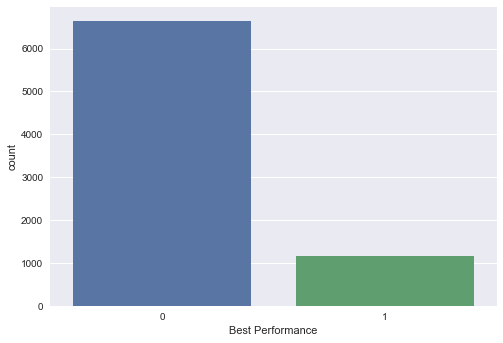

In [70]:
sns.countplot(x='Best Performance', data=y_train)
plt.show()

In [71]:
# under-sampling
# Xy_train = pd.concat([X_train, y_train], axis=1)
# Xy_train_0 = Xy_train[Xy_train['Best Performance'] == 0][:2000]
# Xy_train_1 = Xy_train[Xy_train['Best Performance'] == 1]

# Xy_train = pd.concat([Xy_train_0, Xy_train_1])

# X_train = Xy_train[Xy_train.columns[:-1]]
# y_train = Xy_train[['Best Performance']]

# sns.countplot(x='Best Performance', data=y_train)
# plt.show()

## Train Model

In [72]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier

rf_clf_ = BalancedRandomForestClassifier(max_features='log2', n_estimators=10, random_state=seed)
rf_clf = EasyEnsembleClassifier(n_estimators=10, sampling_strategy='majority', random_state=seed)

rf_clf_.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

EasyEnsembleClassifier(random_state=20, sampling_strategy='majority')

## Evaluate Model

In [73]:
rf_probs = rf_clf.predict_proba(X_test)
y_pred = rf_probs[:, 1]

Random Forest ROC AUC: 0.556
Best Threshold: 0.4998055326926282



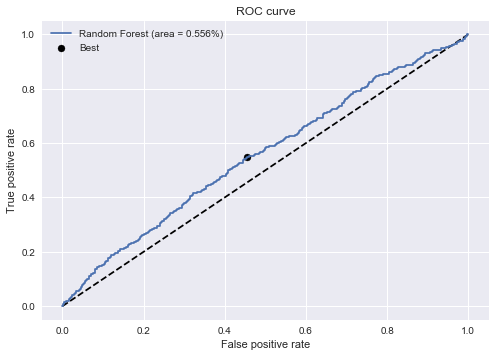

In [74]:
rf_probs = rf_clf.predict_proba(X_test)
y_pred = rf_probs[:, 1]

# set threshold
rf_auc = roc_auc_score(y_test, y_pred)

print(f'Random Forest ROC AUC: {rf_auc:.3f}')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# get the best threshold for testing
J = tpr_rf - fpr_rf
ix = np.argmax(J)
best_threshold = thresholds_rf[ix]
print(f'Best Threshold: {best_threshold}\n')

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.3f}%)')
plt.scatter(fpr_rf[ix], tpr_rf[ix], marker='o', color='black', label='Best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [75]:
y_pred[y_pred >= best_threshold] = 1
y_pred[y_pred < best_threshold] = 0

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.55      0.67      2874
           1       0.17      0.55      0.25       472

    accuracy                           0.55      3346
   macro avg       0.52      0.55      0.46      3346
weighted avg       0.78      0.55      0.61      3346



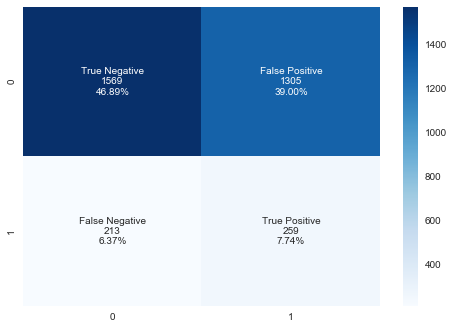

In [76]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

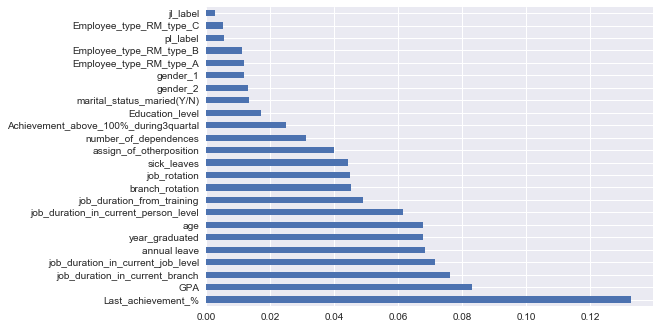

In [77]:
importance_scores = rf_clf_.feature_importances_
indices = np.argsort(importance_scores)

feature_importances = pd.Series(importance_scores, index=X)
feature_importances.nlargest(len(X)).plot(kind='barh')

## Predict!

In [78]:
df_people = pd.read_csv("./test.csv")

In [79]:
columns_to_keep = ['job_level', 'job_duration_in_current_job_level', 'person_level', 
                   'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'Employee_type', 
                   'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences', 
                   'Education_level', 'GPA','year_graduated', 'job_duration_from_training', 'branch_rotation', 
                   'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 
                   'Last_achievement_%', 'Achievement_above_100%_during3quartal']

df_people = df_people[columns_to_keep]

# convert year birth into age
now = datetime.datetime.now()
current_year = now.year
df_people['age'] = current_year - df_people['age']

# change Y/N into 1/0
df_people['marital_status_maried(Y/N)'] = df_people['marital_status_maried(Y/N)'].map(dict(Y=1, N=0))

# process categorical data (one-hot-encoding)
cat_vars = ['Employee_type', 'gender']
for var in cat_vars:
    
    if var == 'Employee_status':
        # add additional feature
        df_people['Employee_status_Contract'] = 0
        
    data_dummies = pd.get_dummies(df_people[var], prefix=var)
    df_people = pd.concat([df_people, data_dummies], axis=1)
    
# remove categorical data
data_vars = df_people.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # filter process

df_people = df_people[to_keep]

# process categorical data (label-encoding)
le = LabelEncoder()

df_people['jl_label'] = le.fit_transform(df_people.loc[:, 'job_level'])
df_people['pl_label'] = le.fit_transform(df_people.loc[:, 'person_level'])

# remove categorical data
del df_people['job_level']
del df_people['person_level']

from sklearn.preprocessing import LabelEncoder
lele = LabelEncoder()
df_people['Education_level'] = lele.fit_transform(df_people['Education_level'])

data_vars = df_people.columns.values.tolist()

X_test = df_people[data_vars]

In [80]:
rf_probs = rf_clf.predict_proba(X_test)
predictions = rf_probs[:, 1]

# set threshold
#predictions[predictions > best_threshold] = 1
#predictions[predictions < best_threshold] = 0

In [81]:
best = np.sum(predictions == 1)
not_best = np.sum(predictions == 0)

print(f'Total best performance of {best+not_best}: {best}')

Total best performance of 0: 0


## Create Submission

In [82]:
f = open("submission.csv","w+")

In [83]:
f.write("index,Best Performance\n")

for i in range(len(predictions)): 
    
    f.write(f"{i},{predictions[i]}\n") 
    
f.close()

In [91]:
sub = pd.read_csv("submission.csv")

In [92]:
sub.head()

,index,Best Performance
0,0,0.499111
1,1,0.501719
2,2,0.500991
3,3,0.498365
4,4,0.501352


In [93]:
#sub['Best Performance'] = sub['Best Performance'].astype('int64')

In [94]:
sub.head()

,index,Best Performance
0,0,0.499111
1,1,0.501719
2,2,0.500991
3,3,0.498365
4,4,0.501352


---

In [95]:
sub.to_csv('submition_final.csv')

In [96]:
sub.set_index('index',inplace=True)

In [97]:
sub.head()

,Best Performance
index,
0,0.499111
1,0.501719
2,0.500991
3,0.498365
4,0.501352


In [98]:
sub.to_csv('submition_.csv')

In [99]:
dp=pd.read_csv('submition_12.csv')

FileNotFoundError: [Errno 2] File submition_12.csv does not exist: 'submition_12.csv'

In [48]:
dp

,index,Best Performance
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
5995,5995,0
5996,5996,1
5997,5997,0
5998,5998,0
